In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
% matplotlib inline

/Users/junyang/anaconda2/envs/p3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


# Loading MINST Dataset

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


# set up an MLP with two hidden layers

In [9]:
# Modeling Definition
def model_two_layers(X_train, Y_train, X_test, Y_test, optimizer, iterations=2000):
    
    loss = []
    validation_acc = []
    
    tf.reset_default_graph()   
    
    #create placeholder
    X = tf.placeholder(tf.float32, [784, None], name="X")
    Y = tf.placeholder(tf.float32, [10, None], name="Y")
    
    #create variable
    #50 nodes in the first hidden layer
    #20 nodes in the second hidden layer
    W1 = tf.get_variable("W1", [100, 784], initializer = tf.contrib.layers.xavier_initializer())
    b1 = tf.get_variable("b1", [100, 1], initializer = tf.zeros_initializer())
    W2 = tf.get_variable("W2", [50, 100], initializer = tf.contrib.layers.xavier_initializer())
    b2 = tf.get_variable("b2", [50, 1], initializer = tf.zeros_initializer())
    W3 = tf.get_variable("W3", [10, 50], initializer = tf.contrib.layers.xavier_initializer())
    b3 = tf.get_variable("b3", [10, 1], initializer = tf.zeros_initializer())
    
    params = {
        'W1':W1,
        'b1':b1,
        'W2':W2,
        'b2':b2,
        'W3':W3,
        'b3':b3
    }
    #forward
    Z = tf.add(tf.matmul(W1, X), b1)
    Z = tf.nn.relu(Z)
    Z = tf.add(tf.matmul(W2, Z), b2)
    Z = tf.nn.relu(Z)
    A = tf.add(tf.matmul(W3, Z), b3)
    
    
    #loss
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=tf.transpose(A), labels=tf.transpose(Y)))
    
    #back
    # Optimizer is given as a model parameters
    optimizer = optimizer.minimize(cost)
    
    
    # Calculate the correct predictions
    correct_prediction = tf.equal(tf.argmax(A), tf.argmax(Y))

    # Calculate accuracy on the test set
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

    
    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)
        # print('hahaha')
        for i in range(iterations):
            minibatch = mnist.train.next_batch(64)
            (minibatch_X, minibatch_Y) = minibatch
            _ , minibatch_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X.T, Y: minibatch_Y.T})

            # report every 100 iterations
            if i % 100 == 0:
                loss.append(minibatch_cost)
                #validation
                validation_batch = (mnist.validation.images, mnist.validation.labels)
                validation_acc.append(accuracy.eval({X: validation_batch[0].T, Y: validation_batch[1].T}))
                #print ("after iteration {}: training loss: {} ; validation accuracy: {}".format(\
                #        i, minibatch_cost, validation_acc[-1]))
        
        print("Train Accuracy:", accuracy.eval({X: X_train.T, Y: Y_train.T}))
        print("Test Accuracy:", accuracy.eval({X: X_test.T, Y: Y_test.T}))
        
        params = sess.run(params)
        return params, validation_acc

# SGD with different constant step size

===SGD with 0.1 step size===
Train Accuracy: 0.6457818
Test Accuracy: 0.6529
===SGD with 0.01 step size===
Train Accuracy: 0.9060364
Test Accuracy: 0.9119
===SGD with 0.001 step size===
Train Accuracy: 0.96514547
Test Accuracy: 0.9611


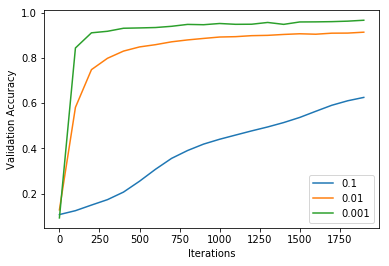

In [19]:
SGD_optimizer_sm = tf.train.GradientDescentOptimizer(learning_rate=0.1)
SGD_optimizer_med = tf.train.GradientDescentOptimizer(learning_rate=0.01)
SGD_optimizer_lg = tf.train.GradientDescentOptimizer(learning_rate=0.001)
print('===SGD with 0.1 step size===')
_, validation_lg = model_two_layers(mnist.train.images,mnist.train.labels,mnist.test.images,mnist.test.labels, SGD_optimizer_lg, iterations=2000)
print('===SGD with 0.01 step size===')
_, validation_med = model_two_layers(mnist.train.images,mnist.train.labels,mnist.test.images,mnist.test.labels, SGD_optimizer_med, iterations=2000)
print('===SGD with 0.001 step size===')
_, validation_sm = model_two_layers(mnist.train.images,mnist.train.labels,mnist.test.images,mnist.test.labels, SGD_optimizer_sm, iterations=2000)

x = range(0,2000,100)
# compare validation accuracy for different step size
plt.plot(x,validation_lg, label='0.1')
plt.plot(x,validation_med, label='0.01')
plt.plot(x,validation_sm, label='0.001')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Validation Accuracy')

Note: A small step size about 0.001 seems to be the optimal constant step size for SGD. From the figure above, we can clearly that SGD with 0.001 step size quickly converge near to the optimum, compared to step size of 0.01 and 0.1.

# SGD w/ momentum with different parameter settings 

In [13]:
# vary momentum 
Momentum_optimizer_m1 = tf.train.MomentumOptimizer(learning_rate=0.01, momentum=0.9)
Momentum_optimizer_m2 = tf.train.MomentumOptimizer(learning_rate=0.01, momentum=0.8)
Momentum_optimizer_m3 = tf.train.MomentumOptimizer(learning_rate=0.01, momentum=0.7)
# vary step size
Momentum_optimizer_l1 = tf.train.MomentumOptimizer(learning_rate=0.1, momentum=0.9)
Momentum_optimizer_l2 = tf.train.MomentumOptimizer(learning_rate=0.01, momentum=0.9)
Momentum_optimizer_l3 = tf.train.MomentumOptimizer(learning_rate=0.001, momentum=0.9)

print("===SGD Momenrtum, step size: 0.01, beta: 0.9===")
_, validation_m1 = model_two_layers(mnist.train.images,mnist.train.labels,mnist.test.images,mnist.test.labels, Momentum_optimizer_m1, iterations=2000)
print("===SGD Momenrtum, step size: 0.01, beta: 0.8===")
_, validation_m2 = model_two_layers(mnist.train.images,mnist.train.labels,mnist.test.images,mnist.test.labels, Momentum_optimizer_m2, iterations=2000)
print("===SGD Momenrtum, step size: 0.01, beta: 0.7===")
_, validation_m3 = model_two_layers(mnist.train.images,mnist.train.labels,mnist.test.images,mnist.test.labels, Momentum_optimizer_m3, iterations=2000)
print("===SGD Momenrtum, step size: 0.1, beta: 0.9===")
_, validation_11 = model_two_layers(mnist.train.images,mnist.train.labels,mnist.test.images,mnist.test.labels, Momentum_optimizer_l1, iterations=2000)
print("===SGD Momenrtum, step size: 0.01, beta: 0.9===")
_, validation_l2 = model_two_layers(mnist.train.images,mnist.train.labels,mnist.test.images,mnist.test.labels, Momentum_optimizer_l2, iterations=2000)
print("===SGD Momenrtum, step size: 0.001, beta: 0.9===")
_, validation_l3 = model_two_layers(mnist.train.images,mnist.train.labels,mnist.test.images,mnist.test.labels, Momentum_optimizer_l3, iterations=2000)



===SGD Momenrtum, step size: 0.01, beta: 0.9===
Train Accuracy: 0.9668364
Test Accuracy: 0.9615
===SGD Momenrtum, step size: 0.01, beta: 0.8===
Train Accuracy: 0.9499273
Test Accuracy: 0.9483
===SGD Momenrtum, step size: 0.01, beta: 0.7===
Train Accuracy: 0.9401636
Test Accuracy: 0.9394
===SGD Momenrtum, step size: 0.1, beta: 0.9===
Train Accuracy: 0.9702182
Test Accuracy: 0.961
===SGD Momenrtum, step size: 0.01, beta: 0.9===
Train Accuracy: 0.96314543
Test Accuracy: 0.9574
===SGD Momenrtum, step size: 0.001, beta: 0.9===
Train Accuracy: 0.90685457
Test Accuracy: 0.913


(0.8, 1)

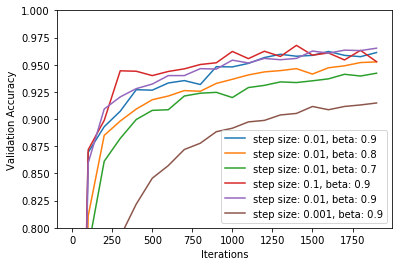

In [20]:
x = range(0,2000,100)
plt.plot(x,validation_m1, label='step size: 0.01, beta: 0.9')
plt.plot(x,validation_m2, label='step size: 0.01, beta: 0.8')
plt.plot(x,validation_m3, label='step size: 0.01, beta: 0.7')
plt.plot(x,validation_11, label='step size: 0.1, beta: 0.9')
plt.plot(x,validation_l2, label='step size: 0.01, beta: 0.9')
plt.plot(x,validation_l3, label='step size: 0.001, beta: 0.9')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Validation Accuracy')
plt.ylim([0.8,1])

Note: the optimal setting for SGD w/ Momentum seems to be: step size between 0.01 ~ 0.1 and momentum coefficient around 0.9. 
From the figure above, we can draw two conclusions: (1) a higher momentum coefficient generally leads to better validation accuracy. (2) If the step size is too small, i.e., 0.001 (brown line), it will take longer training time to get to the optimum. 
And clearly, the winners are the settings with (step size: 0.1, beta: 0.9), the red line,  and (step size: 0.01, beta: 0.9), the purple or blue line. If we take a closer look of these two settings, SGD w/ monentum that has a relatively larger step size (0.1) will converge faster than that has a smaller step size (0.001) during the start of training process (200-300 iterations). But eventually, they will have the similar validation performance.

# Adam with different parameter settings

In [22]:
adam_optimizer_default = tf.train.AdamOptimizer()
adam_optimizer_lg = tf.train.AdamOptimizer(learning_rate=0.1)
adam_optimizer_med = tf.train.AdamOptimizer(learning_rate=0.01)
adam_optimizer_sm = tf.train.AdamOptimizer(learning_rate=0.0001)

print('===Adam with default setting===')
_, validation_default = model_two_layers(mnist.train.images,mnist.train.labels,mnist.test.images,mnist.test.labels, adam_optimizer_default, iterations=2000)
print('===Adam with step size 0.1===')
_, validation_adam_lg = model_two_layers(mnist.train.images,mnist.train.labels,mnist.test.images,mnist.test.labels, adam_optimizer_lg, iterations=2000)
print('===Adam with step size 0.01===')
_, validation_adam_med = model_two_layers(mnist.train.images,mnist.train.labels,mnist.test.images,mnist.test.labels, adam_optimizer_med, iterations=2000)
print('===Adam with step size 0.0001===')
_, validation_adam_sm = model_two_layers(mnist.train.images,mnist.train.labels,mnist.test.images,mnist.test.labels, adam_optimizer_sm, iterations=2000)

===Adam with default setting===
Train Accuracy: 0.97490907
Test Accuracy: 0.9685
===Adam with step size 0.1===
Train Accuracy: 0.4598
Test Accuracy: 0.4659
===Adam with step size 0.01===
Train Accuracy: 0.96761817
Test Accuracy: 0.9601
===Adam with step size 0.0001===
Train Accuracy: 0.9284
Test Accuracy: 0.9294


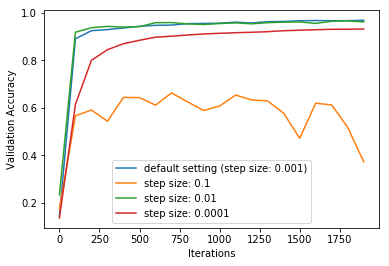

In [25]:
x = range(0,2000,100)
plt.plot(x,validation_default, label='default setting (step size: 0.001)')
plt.plot(x,validation_adam_lg, label='step size: 0.1')
plt.plot(x,validation_adam_med, label='step size: 0.01')
plt.plot(x,validation_adam_sm, label='step size: 0.0001')

plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Validation Accuracy')

Note: the default setting of ADAM optimizer already did a great job in terms of both validation accuracy and test accuracy.

# Q&A

## How did each algorithm qualitatively work?

If we compare the best performance of each algorithm, we can find that they all did a great job on learning the parameters, achieving the test, validation and training accuracy at about 0.96. 


## How hard was it to tune your step sizes and settings? 

From my personal experience, I found it's not that hard to tune the step size and settings. For larger step size, the model will be trained a little bit faster during the first few iterations, but there is risk that it might miss the optimum and cause divergence. For smaller step size, you might need more training iterations untill reach the optimum. So generally speak, we don't want the step size to be too small nor too large.
When tuning these parameters, I just try step size at different scale, i,e, 0.1,0.01,0.001,etc. By looking at their validation performance, we could quickly locate the optimal value range for the step size.
Tuning settings for other optimization algorithms are kind of similar. If we understand the meaning of these parameters, we will have a high-level guideline to search for the optimal, instead of blidnly and exhaustively enumerate all options.


## How did each algorithm perform in validation performance estimates

As I mentioned in the first question, all algorithms could do a great job learning the model with ~0.96 accuracy. The difference is the convergence rate. As can be shown in the figures above, ADAM could reach 0.96 validation accuracy after only about 100 iterations, while for SGD and SGD with Momentum, 200-250 iterations are required for 0.96 validation accuracy.